## Notebook 9A - Wed/Thurs
### Least squares fitting of data to a model
### Total points: 8
#### PHYS 225 Intro to Computational Physics, Fall 2020

![IOLab Wireless Lab Device](iolab_image.JPG)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

## Least squares fitting
Suppose you have a set of data $(x_i, y_i)$ where $x_i$ is the independent (manipulated) variable and $y_i$ is the dependent (responding) variable. 

Suppose we have some theoretical model for how the dependent variable should relate independent variable. Mathematically, this relationship is a function $f$ where 
$$y = f(x, a, b, ...)$$ 
and $a, b,...$ are fit parameters.

The best fit is established by finding the set of parameters that minimize the sum of squares of the residuals, which minimizes the difference between the theoretical curve and the data:
$$\sum_i (r_i)^2 = \sum_i (f(x_i)-y_i)^2$$  
The quantities $r_i = f(x_i)-y_i$ are known are the residuals.

# Task 1: Import and plot position vs time data for a cart rolling up and down a ramp.
This data set was taken using an IoLab Wireless data acquisition device. The IOLab, has a wheel with a position sensor that records linear motion of the IOLab.

1. Preview the data file `Rolling_on_ramp.csv` by viewing it in the Jupyter file navigator or in a text editor.
1. Use the `np.loadtxt` function to import the data set.
1. Create a variable named `tdata` for the time column.
1. Create a variable namde `ydata` for the position column.
1. Plot position vs time for the cart (which rolled up and down the ramp).

[[ 0.       0.382    1.7     -1.18182]
 [ 0.005    0.3905   1.7     -1.72727]
 [ 0.01     0.399    1.7     -2.27273]
 [ 0.015    0.407    1.65    -2.     ]
 [ 0.02     0.415    1.6     -1.72727]]


<IPython.core.display.Javascript object>


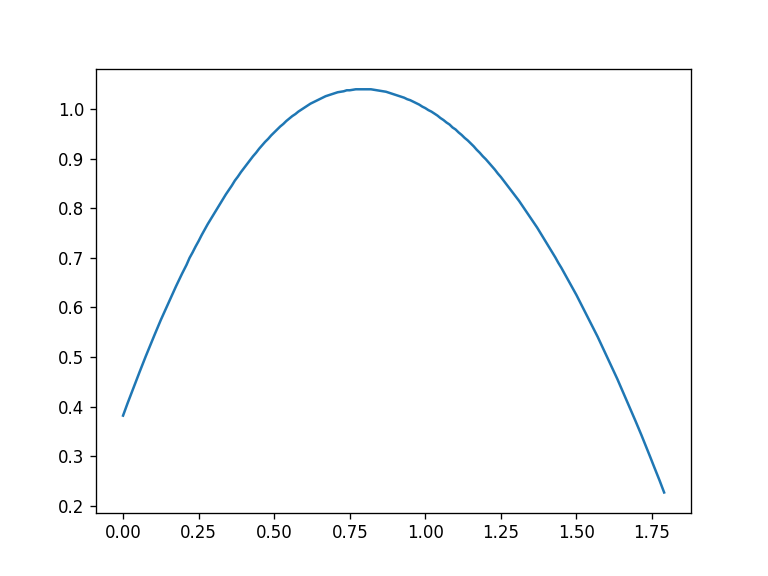

<IPython.core.display.Javascript object>


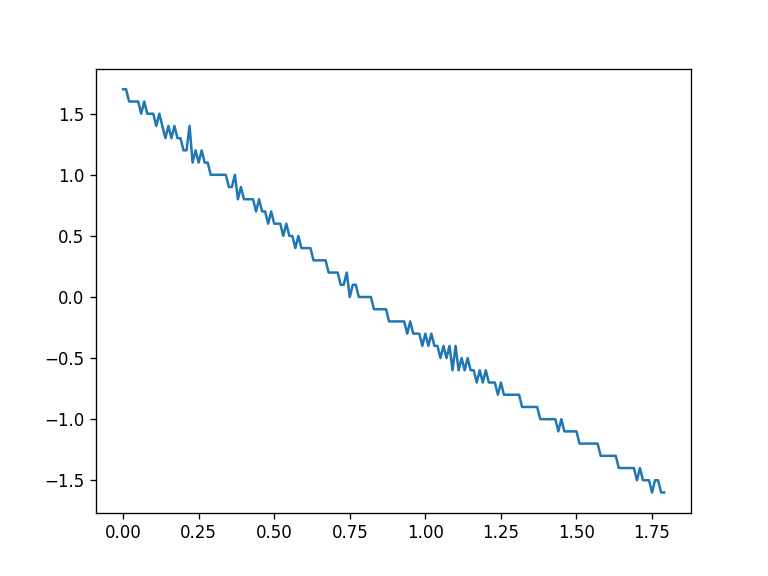

<IPython.core.display.Javascript object>


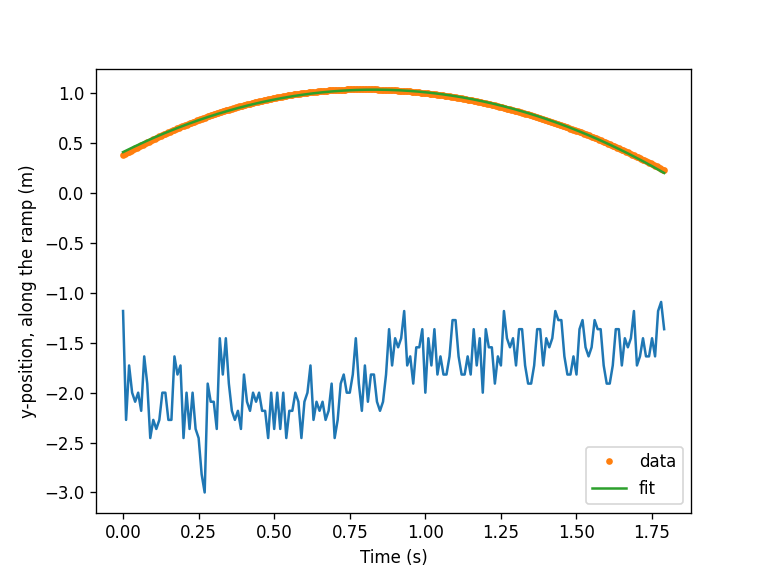

359
321.305
283.2315
0.005


In [5]:
""" Import the data of cart rolling and plot it """

### BEGIN SOLUTION
data = np.loadtxt("Rolling_on_ramp.csv", delimiter=",", skiprows=1)
print(data[0:5])
tdata = data[:,0]
ydata = data[:,1]
plt.plot(tdata, ydata)
plt.figure()
plt.plot(tdata, data[:,2])
plt.figure()
plt.plot(tdata, data[:,3])

print(len(tdata))
print( tdata.sum() )
print( ydata.sum() )
print( np.mean(tdata[1:] - tdata[0:-1]) )

### END SOLUTION

In [3]:
""" Test cases for importing data """
assert len(tdata) == 359 # check length of tdata
assert len(ydata) == 359 # check length of ydata
assert abs(tdata.sum() - 321.305) < 0.2 # check t values
assert abs(ydata.sum() - 283.2315) < 0.2 # check y values
assert ( np.mean(tdata[1:] - tdata[0:-1])  - 0.005 ) < 1e-5  # check average time step

# Task 2: Define a theoretical fit function for linear motion under constant acceleration.

The acceleration of the cart should be constant. Therefore the position should be given by

$$y(t) = y_0 + v_0 t + \frac{1}{2}a t^2$$.

Define the following function:

**Function name:** `const_acc`

**Inputs** 
* `t` - time (s)
* `y0` - initial position (m)
* `v0` - initial velocity (m/s)
* `a` - acceleration (m/s^2)

**Outputs**
* `y`  - current position at time `t` (m)

In [1]:
""" Define the const_acc fit function """

### BEGIN SOLUTION

def const_acc(t, y0, v0, a) :
    y = y0 + v0*t + 0.5*a* t**2
    return y

print( const_acc(2, 0.5, -4, 10) )
print( const_acc(3, 0.5, -4, 10) )
print( const_acc(2, -1.0, 6, 10) )
print( const_acc(1.5, 4, 3, 7) )

### END SOLUTION

12.5
33.5
31.0
16.375


In [5]:
""" test cases for const_acc function """
assert abs( const_acc(2, 0.5, -4, 10) - 12.5) < 1e-5
assert abs( const_acc(3, 0.5, -4, 10) - 33.5) < 1e-5
assert abs( const_acc(2, -1.0, 6, 10) - 31) < 1e-5
assert abs( const_acc(1.5, 4, 3, 7)  - 16.375) < 1e-5

# Task 3: Define the sum of squares of the residual

The next step in identifying the best fit parameters for the cart on a ramp is to calculate the sum of squares of the residuals. 

Define a function that calculates the sum of squares of the residuals, $\sum_i (f(t_i, y_0,v_0,a)-y_i)^2$, where the theoretical function $f$ is the `const_acc` function defined in the previous task.

**Function name:** `sum_squared_residuals`

**Inputs** The inputs should be the three 
* `tarray` - time array from data
* `yarray` - position array from data
* `y0` - initial position (needed for the `const_acc` fit function)
* `v0` - initial velocity (needed for the `const_acc` fit function)
* `a` - acceleration (needed for the `const_acc` fit function)


**Outputs**

`SSR` - sum of squared residuals

Hints: (1) Keep all your math as arrays. No loops are needed.

In [6]:
""" Define the sum_residual_squares function """
### BEGIN SOLUTION

def sum_squared_residuals(tarray, yarray, y0, v0, a) :
    yfit = const_acc(tarray, y0, v0, a)
    residual = yfit - yarray
    SSR = np.sum(residual**2)
    return SSR

t = np.linspace(0,3)
y = const_acc(t, 0, 14, 10)
print(sum_squared_residuals(t,y, 0.01, 14.2, 9.8))

### END SOLUTION

0.6361630358099178


In [7]:
""" Test case for sum_residual_squares function """

t = np.linspace(0,3)
y = const_acc(t, 0, 14, 10)
assert abs(sum_squared_residuals(t,y, 0.01, 14.2, 9.8)  - 0.63616 ) < 0.2

# Task 4 : Manually search for the best fit parameters

![Not optimized fit of cart position along ramp](ramp_fit_not_optimized.png)

1. Define a set of guesses for fit parameters
1. Plot the position vs time data
1. Plot the position vs time fit (this requires using the `const_acc` function)
1. Use the `sum_residual_squares` function to calculate the "squares"
1. Iteratively change the fit parameters to find the "least squares"
1. Goal: you get the `sum_residual_squares` below 0.2
1. create three variables for your optimized fit parameters `y0_best`, `v0_best`, `a_best`

In [1]:
""" Iteratively seek out the best fit parameters """

### BEGIN SOLUTION

y0_best = 0.4  # initial height guess
v0_best = 1.51 # initial velocity guess
a_best = -1.814  # acceleration guess


yfit = const_acc(tdata,y0_best, v0_best, a_best) # fitted curve
SSR = sum_squared_residuals(tdata, ydata, y0_best, v0_best, a_best)  # sum squared residuals

plt.figure()

plt.plot(tdata, ydata, '.', label="data") # plot data
plt.plot(tdata, yfit, label="fit") # plot fit
plt.legend()
plt.title("You can find a better fit than this!  SSR = " + str(SSR))
plt.xlabel("Time (s)")
plt.ylabel("y-position, along the ramp (m)")
#plt.savefig("ramp_fit_not_optimized.png")

### END SOLUTION

NameError: name 'const_acc' is not defined

In [10]:
""" Test cases for manual optimization """

SSR = sum_squared_residuals(tdata, ydata, y0_best, v0_best, a_best)  # sum squared residuals
assert SSR < 0.2  # a bit tedious but doable fit 

# Task 5: Understanding how to fit data using `curve_fit()`

Read the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) on `scipy.optimize.curve_fit` and answer the following questions:
1. What is the input argument `f`? What python object type is it (e.g., numpy array, integer, etc)?
1. What is `xdata`?
1. What is `ydata`?
1. What is `p0`?
1. How many things/objects are returned by `curve_fit`?
1. Which object returned by `curve_fit` (`popt` or `pcov`) contains the best fit parameters?

**Answer your questions here**

### Example of using curve fit

**Important note about defining the fit function**  
`scipy.optimize.curve_fit` assumes that the first argument of the fit function `f` is the independent variable. The 2nd and following arguments will be the fit parameters that are optimized.  

In [3]:
from scipy.optimize import curve_fit

In [6]:
popt, pcov = curve_fit(f = const_acc, xdata = tdata, ydata = ydata, p0=[1,1,1])

The best fit parameters `popt` and the initial guesses `p0` are lists. The parameters appear in the same order as in the fit function, which in this case is `const_acc`.

* `p0` is a list of length three and the values correspond to the **initial guesses** for `[y0, v0, a]`.
* `popt` is a list of length three and the values correspond to the **best fit values** of `[y0, v0, a]`.


In [7]:
print(popt)

[ 0.41059798  1.50656276 -1.81393789]


# Task 6: Plot the best fit curve generated from `curve_fit`

1. Plot the data along with the best fir curve.
1. In a variable named `SSR`, store the Sum of Squared Residuals (SSR) for the best fit parameters.
1. In a separate figures, plot the residuals (the difference between data and best fit).

You can reuse a lot of the code from a couple of tasks back

<IPython.core.display.Javascript object>


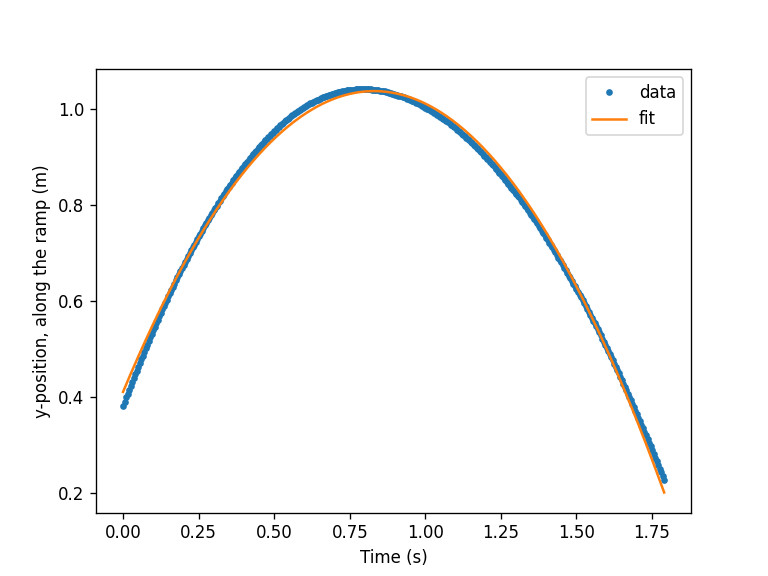

<IPython.core.display.Javascript object>


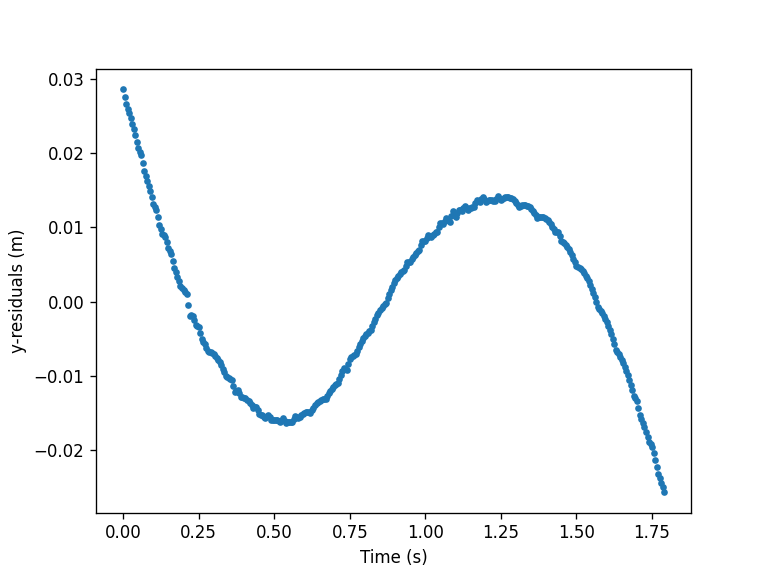

Text(0, 0.5, 'y-residuals (m)')

In [10]:
""" Fit and data for the best fit from scipy.optimize.curve_fit """

### BEGIN SOLUTION

y0_best = popt[0]  # initial height guess
v0_best = popt[1] # initial velocity guess
a_best = popt[2]  # acceleration guess


yfit = const_acc(tdata,y0_best, v0_best, a_best) # fitted curve
#SSR = sum_squared_residuals(tdata, ydata, y0_best, v0_best, a_best)  # sum squared residuals
plt.figure()
plt.plot(tdata, ydata, '.', label="data") # plot data
plt.plot(tdata, yfit, label="fit") # plot fit
plt.legend()
#plt.title("You can find a better fit than this!  SSR = " + str(SSR))
plt.xlabel("Time (s)")
plt.ylabel("y-position, along the ramp (m)")
#plt.savefig("ramp_fit_not_optimized.png")

plt.figure()
plt.plot(tdata, yfit - ydata,".")  # plot residuals
plt.xlabel("Time (s)")
plt.ylabel("y-residuals (m)")


### END SOLUTION

In [15]:
""" test cases for the best fit """
assert abs(SSR) < 0.06 # check the best fit Sum of Squared Residuals


# Task 7: Fit acceleration data of an oscillating mass on a spring

1. Import the `iOLab_on_a_spring_acceleration.csv` data.
1. Store the time column in `tdata` and the y-acceleration (vertical)  in `ydata`
1. Plot acceleration vs time.
1. Define a fit function `a_SHM` for the acceleration during simple harmonic motion. 
    * The inputs are
        * `t` - time (s)
        * `a_max` - the amplitude of oscillating acceleration
        * `T` - the period of motion
        * `phi` - a phase offset
        * `a_background` - a constant acceleration present even when there is no oscillation
    * The return quantity is `a` - the acceleration (m/s^2) 
1. Use `curve_fit()` to find the best fit parameters. You will probably need to supply initial guesses. Label the best fit parameters `a_max_best`, `T_best`, `phi_best`, `a_background_best`.
1. Make a plot showing the best fit and the data together. They should match closely, similar to...

![Accelerometer data of oscillating mass with fit](oscillating_mass_fit.png)

length of tdata =  2000
 average acc-value =  9.8567804255685
max =  10.099999978070697
mean =  7.600709155463658
SSR =  6.797907926786564


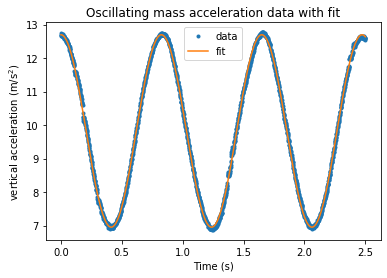

In [20]:
""" Import, plot and fit the oscillating IOlab data """

### BEGIN SOLUTION

# Import
data = np.loadtxt("iOLab_on_a_spring_acceleration.csv", delimiter=",", skiprows=1)
tdata = data[:,0]
accdata = data[:,1]

print("length of tdata = ", len(tdata))
print(" average acc-value = ", accdata.mean())

# plot data 
plt.plot(tdata, accdata, '.', label="data")
plt.xlabel("Time (s)")
plt.ylabel("vertical acceleration (m/s$^2$)")

# define the fit function
def a_SHM(t, a_max, T, phi, a_background) :
    a = a_max * np.cos(2 * np.pi / T * t + phi) + a_background
    return a

t = np.linspace(0,0.74,1000)

print( "max = ", np.max(a_SHM(t, 2.5,0.74, 5, 7.6) ) )
print( "mean = ", np.mean(a_SHM(t, 2.5,0.74, 5, 7.6) ) )


# run the best fit
popt, pcov = curve_fit(f = a_SHM, xdata = tdata, ydata = accdata, p0=[3,1,1,10])

# get the best fit parameter
a_max_best = popt[0]  # best amplitude (in m/s^2)
T_best = popt[1] # best period
phi_best = popt[2]  # best phase
a_background_best = popt[3] # best background acceleration

# get the best fit curve
afit = a_SHM(tdata,a_max_best, T_best, phi_best, a_background_best) # fitted curve

print("SSR = ", np.sum( (afit - accdata)**2 ) )

# plot the best fit curve
plt.plot(tdata, afit, label="fit") # plot fit
plt.legend()
plt.title("Oscillating mass acceleration data with fit")
#plt.savefig("oscillating_mass_fit.png")
### END SOLUTION


In [18]:
""" Test case for imported data (tdata and accdata) 
    and the best fit function a_SHM() """

assert len(tdata) == 2000
assert len(accdata) == 2000
assert abs(accdata.mean()  -  9.8567) < 1e-3
t = np.linspace(0, 0.74, 10000)
assert abs(np.max(a_SHM(t, 2.5,0.74, 5, 7.6) -  (7.6 + 2.5)) )  < 1e-3
assert abs(np.mean(a_SHM(t, 2.5,0.74, 5, 7.6)) -  7.6)   < 1e-3





In [19]:
""" Test cases for the best fit parameters """

afit = a_SHM(tdata,a_max_best, T_best, phi_best, a_background_best) # fitted curve
SSR = np.sum( (afit - accdata)**2 ) 
assert abs(SSR - 6.7979) < 1e-1